
A notebook for visualizing the outcome of Reinforcement Learning for TSP
==============
    
<font color=#000000 size=3 face="黑体">  This notebook can be used to test and train a pointer network to solve TSP.
Structure of networks and function for training and searching is in the package call TSP_pytorch. The version of pytorch used in the packages is 1.0

In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from TSP_pytorch import *
%matplotlib inline

The following code use newtwork before training to solve TSP and visualizing the outcome.

mean_length_before_training:tensor(19.0344)
length_real_of_picture_before_training:[20.41263  17.771118]
est_real_of_picture_before_training:[-0.04962958 -0.04967576]


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


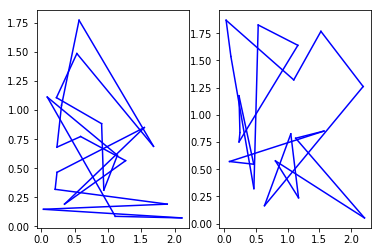

In [2]:
ptr_net=Ptr_Net(hidden_size=128, embedding_size=128,dropout_p=0)
critic_net=Critic_Net()
ptr_net.apply(weights_init)
critic_net.apply(weights_init)
points=get_point(100,20,2)
#data visualization before training
roads=ptr_net.get_road(points)
print('mean_length_before_training:'+str(torch.mean(get_length_sum(points,roads))))
print('length_real_of_picture_before_training:'+str(get_length_sum(points,roads).numpy()[0:2]))
print('est_real_of_picture_before_training:'+str(critic_net(points).detach().numpy()[0:2]))
draw(points,roads)

the follwoiing code is for training

In [ ]:
ptr_net,critic_net=training(ptr_net,critic_net,batch=128,city=20,coors=2,lr_c = 0.001,lr_p = 0.001,beta1=0.9,
                    n_baseline_gradient_steps=1,train_steps=1000,show_i_time=10,show_j_time=10,show_j=False,
                            print_training_log=True,log_file_name='train_log.csv')

the following code is the 'Active Search' part in the paper. It use policy gradient to guide the searching. This searching can be used to both pre-trained network and untrain-network

In [ ]:
point=points[0]
ptr_net=active_search(ptr_net,point,batch_size=128,plot_comp=True,plot_mean=True,save_name='search1_',
              log_file_name='search_log.csv',iter_time=50,loss_sign=1)['ptr_net']

You can see the outcome after training by the following code

In [ ]:
roads=ptr_net.get_road(points)
print('mean_length_before_training:'+str(torch.mean(get_length_sum(points,roads))))
print('length_real_of_picture_before_training:'+str(get_length_sum(points,roads).numpy()[0:2]))
print('est_real_of_picture_before_training:'+str(critic_net(points).detach().numpy()[0:2]))
draw(points[0:2,:,:],roads[0:2,:])
roads[0:2,]